In [1]:
# Import Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statistics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from itertools import permutations
from scipy.spatial.distance import pdist, squareform
from scipy.ndimage import zoom

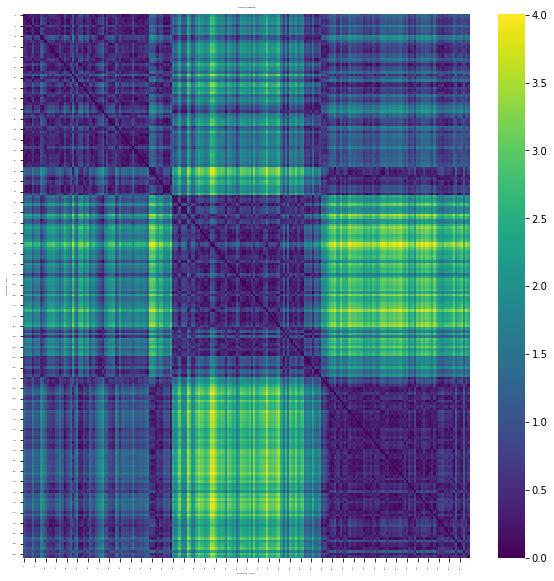

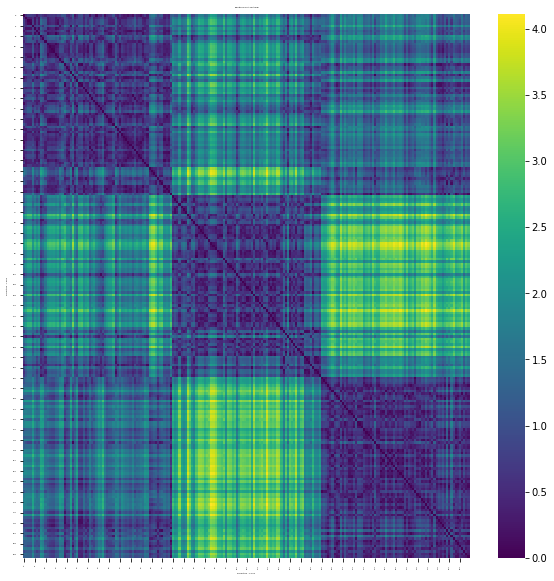

In [2]:
# Read COMAD 2 dim dist matrix
COMAD = 'COMAD-wheat.csv' 
COMAD_csv = pd.read_csv(COMAD)

# Read MEAN PCA 2 dim  dist matrix
MEAN_PCA = 'PCA-MEAN-wheat.csv' 
MEAN_PCA_csv = pd.read_csv(MEAN_PCA)

# Read naming columns
columns = 'columns_heatmap.csv' 
columns_csv = pd.read_csv(columns)

dist_matrices = [COMAD_csv, MEAN_PCA_csv]
method_names = ['COMAD heatmap', 'Traditional PCA heatmap']

for i,j in zip(dist_matrices,method_names):
    plt.figure(figsize=(10, 10))
    sns.heatmap(i, cmap='viridis', annot=False, annot_kws={"size": 10})

    title_fontsize = 2
    label_fontsize = 2

    plt.title(f'{j}', fontsize=title_fontsize)
    plt.xlabel('Projection - X axis', fontsize=label_fontsize)
    plt.ylabel('Projection - Y axis', fontsize=label_fontsize)

    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=label_fontsize)
    ax.tick_params(axis='y', labelsize=label_fontsize)

    plt.show()

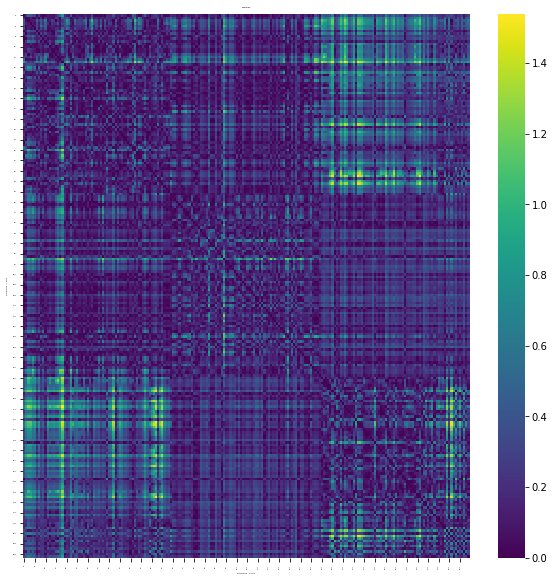

In [3]:
# Calculate the absolute difererce of 2 dist matrices andplot heatmap
abs_diff_dist_matrices = (COMAD_csv - MEAN_PCA_csv).abs()

# Normalize the DataFrame to get percentages
normalized = abs_diff_dist_matrices / abs_diff_dist_matrices.sum().sum() * 100

plt.figure(figsize=(10, 10))
sns.heatmap(abs_diff_dist_matrices, cmap='viridis', annot=False, annot_kws={"size": 10},fmt='.2f')

title_fontsize = 2
label_fontsize = 2

plt.title('Heatmap', fontsize=title_fontsize)
plt.xlabel('Projection - X axis', fontsize=label_fontsize)
plt.ylabel('Projection - Y axis', fontsize=label_fontsize)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=label_fontsize)
ax.tick_params(axis='y', labelsize=label_fontsize)

plt.show()

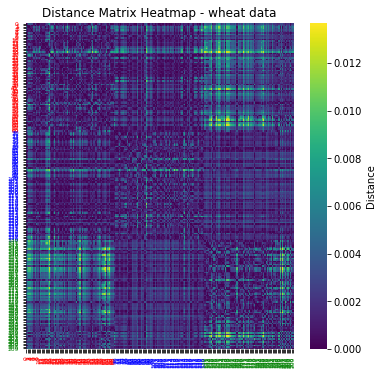

In [4]:
# Create a custom color mapping based on the species
species_color_mapping = columns_csv['wheat_class'].map({1: 'red', 2: 'blue', 3: 'green'})

# Plot the distance matrix heatmap with colored labels
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(normalized, cmap='viridis', ax=ax,
            cbar_kws={'label': 'Distance'})

# Set the tick labels and colors
ax.set_xticks(np.arange(normalized.shape[0]) + 0.5)
ax.set_yticks(np.arange(normalized.shape[0]) + 0.5)
ax.set_xticklabels(species_color_mapping.index, rotation=90, fontsize=6)
ax.set_yticklabels(species_color_mapping.index, rotation=0, fontsize=6)

# Color the tick labels
for tick, color in zip(ax.get_xticklabels(), species_color_mapping):
    tick.set_color(color)

for tick, color in zip(ax.get_yticklabels(), species_color_mapping):
    tick.set_color(color)

# Show the plot
plt.title('Distance Matrix Heatmap - wheat data')
plt.show()

In [5]:
def overall_difference_percentage(matrix1, matrix2):
    # Calculate the Frobenius norms
    norm_difference = np.linalg.norm(matrix1 - matrix2)
    norm_average = np.linalg.norm((matrix1 + matrix2) / 2)
    
    # Return the percentage difference
    return (norm_difference / norm_average) * 100

overall_diff_percentage = overall_difference_percentage(MEAN_PCA_csv, COMAD_csv)
print(overall_diff_percentage)

20.21542765669527


In [6]:
# Dataframe Compare
knn_comad_csv = pd.read_csv('knn_comad_pca.csv')
knn_mean_csv = pd.read_csv('knn_mean_pca.csv')

# DF compare
df_compare = knn_mean_csv.compare(knn_comad_csv, align_axis=1)
df_compare = df_compare.rename(columns={'self': 'MEAN', 'other': 'COMAD'}, level=-1)

df_compare

wheat_class       Point No knn        Point No Dist Matrix      
          MEAN COMAD         MEAN  COMAD                 MEAN COMAD
0          NaN   NaN        182.0  143.0                  182   143
1          NaN   NaN        143.0  209.0                  143   209
2          NaN   NaN        209.0  147.0                  209   147
3          1.0   3.0         69.0  166.0                   69   166
4          NaN   NaN        203.0  181.0                  203   181
5          NaN   NaN        163.0  182.0                  163   182
6          3.0   1.0        161.0   19.0                  161    19
7          3.0   1.0        198.0   26.0                  198    26
8          NaN   NaN        167.0  150.0                  167   150
9          NaN   NaN        204.0  163.0                  204   163
10         NaN   NaN        181.0  195.0                  181   195
11         NaN   NaN        148.0  196.0                  148   196
12         NaN   NaN        147.0  152.0                  147   152
13         NaN   NaN        179.0  194.0                  179   194
14         NaN   NaN        194.0  161.0                  194   161
15         3.0   1.0        208.0   69.0                  208    69
16         NaN   NaN        183.0  151.0                  183   151
17         NaN   NaN        166.0  162.0                  166   162
18         3.0   1.0        162.0   62.0                  162    62
19         NaN   NaN        150.0  205.0                  150   205